In [25]:
import torch
import torch.nn as nn

# 1. 설정 (Configuration)
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
EPOCHS = 10
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using Device: {DEVICE}")
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28,128),
            nn.LeakyReLU(), # Changed ReLU to LeakyReLU
            nn.Linear(128,64),
            nn.LeakyReLU(), # Changed ReLU to LeakyReLU
            nn.Linear(64,16) # Increased latent dimension from 3 to 16
        )

        self.decoder = nn.Sequential(
            nn.Linear(16,64), # Increased latent dimension from 3 to 16
            nn.LeakyReLU(), # Changed ReLU to LeakyReLU
            nn.Linear(64,128),
            nn.LeakyReLU(), # Changed ReLU to LeakyReLU
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )

    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
model = Autoencoder().to(DEVICE)
print(model)


Using Device: cuda
Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=128, out_features=784, bias=True)
    (5): Sigmoid()
  )
)


In [26]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [27]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)


In [28]:
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [31]:
for epoch in range(EPOCHS):
    total_loss = 0
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0),-1).to(DEVICE)
        optimizer.zero_grad()
        output = model(img)
        loss = criterion(output, img)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch[{epoch+1}/{EPOCHS}], Loss: {total_loss/len(train_loader):.4f}")
print("학습완료")


Epoch[1/10], Loss: 0.0132
Epoch[2/10], Loss: 0.0129
Epoch[3/10], Loss: 0.0127
Epoch[4/10], Loss: 0.0124
Epoch[5/10], Loss: 0.0122
Epoch[6/10], Loss: 0.0120
Epoch[7/10], Loss: 0.0119
Epoch[8/10], Loss: 0.0117
Epoch[9/10], Loss: 0.0116
Epoch[10/10], Loss: 0.0114
학습완료


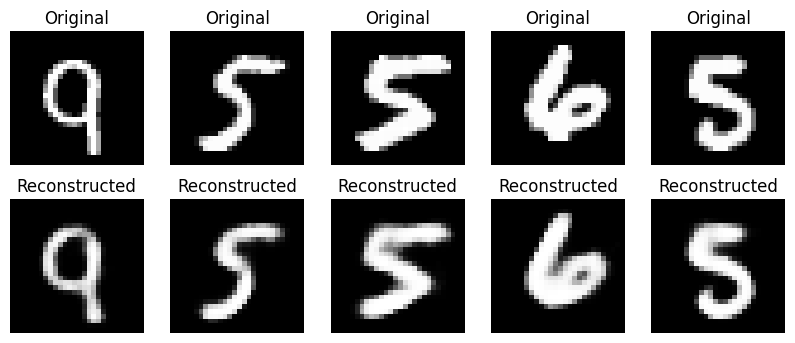

In [33]:
model.eval()
with torch.no_grad():
    # 데이터 하나 가져오기
    data_iter = iter(train_loader)
    images, _ = next(data_iter)

    # 모델에 넣기
    inputs = images.view(images.size(0), -1).to(DEVICE)
    outputs = model(inputs)

    # CPU로 다시 가져오기 (그림 그리기 위해)
    inputs = inputs.cpu().numpy()
    outputs = outputs.cpu().numpy()

    # 그림 그리기
    plt.figure(figsize=(10, 4))
    for i in range(5):
        # 원본
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(inputs[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # 복원본
        ax = plt.subplot(2, 5, i + 1 + 5)
        plt.imshow(outputs[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()